# Tanzania Water Wells

## Business Understanding 

### Overview

Boosting food production and reducing reliance on aid are key goals in developing countries. International aid groups (NGOs) often tackle these challenges by building water systems. However, a crucial step is being missed. Many NGOs launch new projects without utilizing existing data, leading to inefficient use of resources and donor funding.

Tanzania, as a developing country, has encountered this issue prominently. Here, poorly planned water projects have resulted in wasted funds and, even worse, lives lost due to insufficient access to clean water.

### Problem Statement

Maji Safi Global, an NGO dedicated to improving water distribution in developing nations, relies on donor funding to support its community outreach efforts. Collaborating with the Tanzanian government through the Visima Vyema initiative, Maji Safi aims to enhance existing infrastructure by repairing dysfunctional wells and analyzing patterns in non-operational wells. 

In my role as a data scientist, I am tasked with identifying wells in need of repair and conducting an in-depth analysis to forecast patterns in non-functional wells. This analysis will provide valuable insights for Maji Safi Global and the Tanzanian government, guiding strategic investments for the future.

# Data Understanding

### 1 Features description

I will use the features in this dataset to predict the wells' operating condition and the features are as follows:

**amount_tsh** - Total static head (amount water available to waterpoint)

**date_recorded** - The date the row was entered

**funder** - Who funded the well

**gps_height** - Altitude of the well

**installer** - Organization that installed the well

**longitude** - GPS coordinate

**latitude** - GPS coordinate

**wpt_name** - Name of the waterpoint if there is one

**num_private** -basin - Geographic water basin

**subvillage** - Geographic location

**region** - Geographic location

**region_code** - Geographic location (coded)

**district_code** - Geographic location (coded)

**lga** - Geographic location

**ward** - Geographic location

**population** - Population around the well

**public_meeting** - True/False

**recorded_by** - Group entering this row of data

**scheme_management** - Who operates the waterpoint

**scheme_name** - Who operates the waterpoint

**permit** - If the waterpoint is permitted

**construction_year** - Year the waterpoint was constructed

**extraction_type** - The kind of extraction the waterpoint uses

**extraction_type_group** - The kind of extraction the waterpoint uses

**extraction_type_class** - The kind of extraction the waterpoint uses

**management** - How the waterpoint is managed

**management_group** - How the waterpoint is managed

**payment** - What the water costs

**payment_type** - What the water costs

**water_quality** - The quality of the water

**quality_group** - The quality of the water

**quantity** - The quantity of water

**quantity_group** - The quantity of water

**source** - The source of the water

**source_type** - The source of the water

**source_class** - The source of the water

**waterpoint_type** - The kind of waterpoint

**waterpoint_type_group** - The kind of waterpoint

### Load Libraries

In [89]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
!pip install xgboost
from xgboost import XGBClassifier

from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

In [2]:
#importing training data
df1 = pd.read_csv('Downloads/Training Set Values.csv')
df2 = pd.read_csv('Downloads/Training_set_labels.csv')

In [3]:
#Merging df1 & df2
df=pd.merge(df1, df2, on='id', how='outer')
#Viewing the first five rows of the combined dataframe
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [4]:
#Viewing the last 5 rows
df.tail()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional
59399,26348,0.0,2011-03-23,World Bank,191,World,38.104048,-6.747464,Kwa Mzee Lugawa,0,...,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [5]:
#Checking for number of rows and columns
df.shape

(59400, 41)

This dataset has 59,400 rows and 41 columns

In [6]:
# Getting the basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

Of the 41 columns in our dataset, 10 are numerical and 31 have categorical data.

In [7]:
#Getting the statistical summary of numerical columns
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


## Data Cleaning

### 1. Duplicates

In [8]:
#Checking for duplicate rows number
duplicate_rows_count = df.duplicated().sum()
duplicate_rows_count

0

Good News! No duplicates were found in our dataset.

### 2. Missing value

In [9]:
#Checking for missing values
df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3637
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     2
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3878
scheme_name              28810
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [10]:
#Calculating the percentage of the missing value per column
missing_percentage_per_column = (df.isnull().sum() / len(df)) * 100

# Filtering to only print non-zero columns
non_zero_missing_percentage_columns = missing_percentage_per_column[missing_percentage_per_column > 0]

# Convert the series to a DataFrame to use the style method
non_zero_missing_percentage_df = non_zero_missing_percentage_columns.to_frame(name='Missing Percentage')

# Display the DataFrame with a gradient background
styled_df = non_zero_missing_percentage_df.style.background_gradient(cmap='coolwarm')
styled_df

,Missing Percentage
funder,6.122896
installer,6.153199
wpt_name,0.003367
subvillage,0.624579
public_meeting,5.612795
scheme_management,6.528620
scheme_name,48.501684
permit,5.144781


#### Funder

The government may examine whether there's a correlation between faulty wells and their funding sources. If a pattern emerges, they could investigate the reasons behind it and identify contributing factors. Therefore, we shall only drop the rows with missing values in this column since its only 5.86%.

In [11]:
#dropping the missing values in the funder column
df.dropna(subset=['funder'], inplace=True)

#### Installer
Both the government and Maji Safi Global are interested in determining if there's a correlation between the installer and the occurrence of faulty wells. A specific installer may be responsible for substandard work. In this case we only drop the 5.91% rows with the missing values in this column.

In [12]:
df.dropna(subset=['installer'], inplace=True)

#### Subvillage
This column gives us the location of the wells which we can get from longitude and latitude so we drop this column.

In [13]:
# We drop the subvillage column
df.drop(columns=['subvillage'], inplace=True)

#### Public_meeting
The purpose of the column, pertaining to the type of meeting, is ambiguous, therefore we drop it.

In [14]:
# We drop the public_meeting column
df.drop(columns=['public_meeting'], inplace=True)

#### Permit
Maji Safi Global aims to avoid investing in unpermitted wells, making this column valuable for our assignment. Therefore, we will only eliminate rows with missing values.

In [15]:
df.dropna(subset=['permit'], inplace=True)

#### Scheme_name and Scheme_management
The "scheme_name" column has 48.78% of its values missing, while "scheme_management" has 6.53% missing values. Since both columns provide information about the entity operating the water point, we need to explore whether the operator affects the pump's functionality. Consequently, we decide to drop the "scheme_name" column due to its high percentage of missing values and remove the missing rows from the "scheme_management" column.

In [16]:
# We drop the scheme_name column
df.drop(columns=['scheme_name'], inplace=True)

#Then drop the missing values in the scheme_management column
df.dropna(subset=['scheme_management'], inplace=True)

#### wpt_name
This column provides the name of the waterpoint, which is not significant for our objective. We have other features that capture the geographical location of the well so we just drop the column entirely.

In [17]:
#dropping the wpt_name column
df.drop(columns=['wpt_name'], inplace=True)

In [18]:
#Counter checking Missing Values
df.isnull().sum().sum()

0

Great! Our dataset does not have any missing values. 

### 3. Outliers

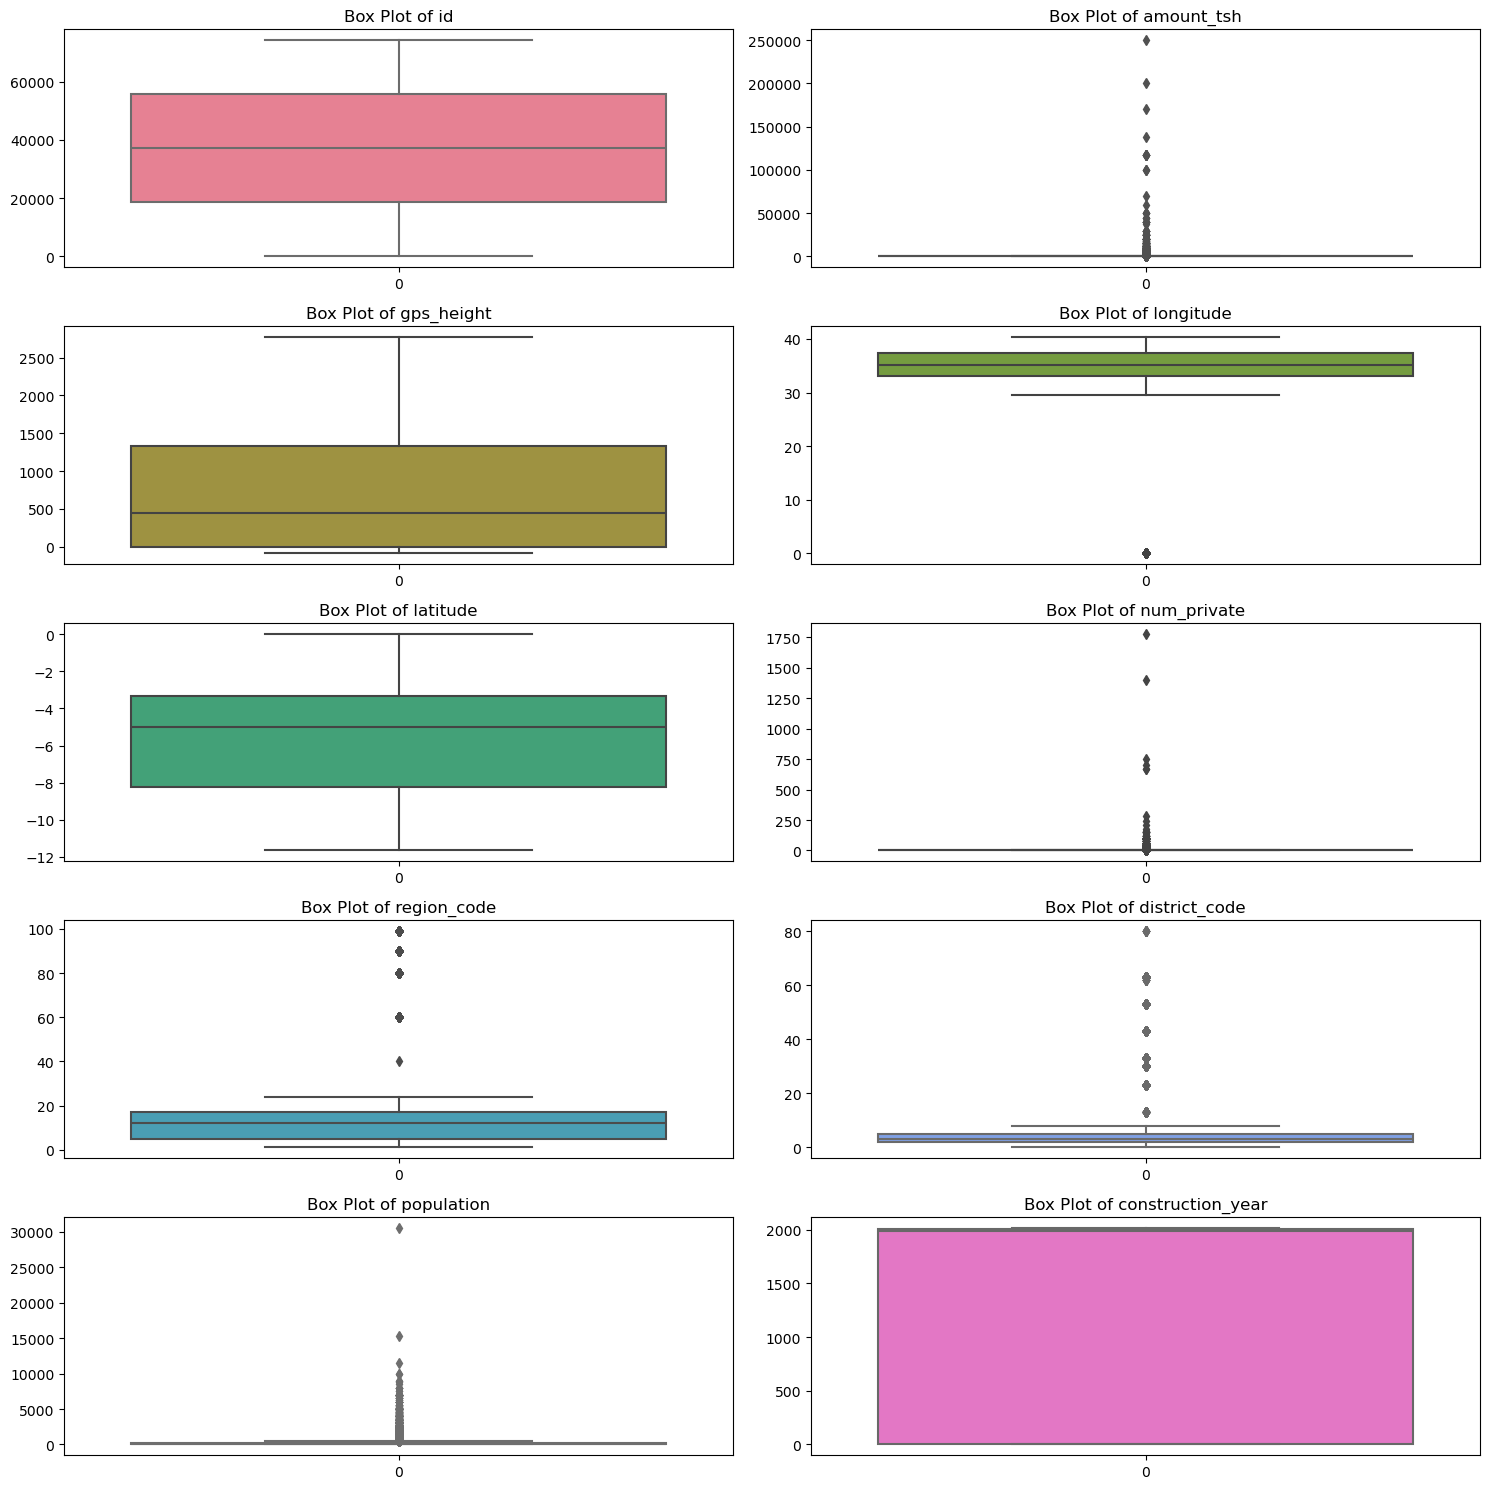

In [19]:
# Selecting numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# To do a layout of two columns
num_columns = 2

# Calculating the number of rows needed
num_rows = len(numerical_columns) // num_columns + (len(numerical_columns) % num_columns > 0)

# Create a figure and set the size
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 3))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define a colormap
colors = sns.color_palette("husl", len(numerical_columns))

# Loop through each numerical column and create a box plot
for i, column in enumerate(numerical_columns):
    sns.boxplot(data=df[column], ax=axes[i], color=colors[i])
    axes[i].set_title('Box Plot of {}'.format(column))

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout
plt.tight_layout()
plt.show()

From the visualization, we can see that amount_tsh, longitude, num_private, region_code, district_code, and population contain outliers. Since longitude, region_code, and district_code correspond to actual geographical locations, we will leave these values unchanged. Furthermore, amount_tsh, num_private, and population are meaningful indicators, and we will perform exploratory data analysis (EDA) to examine their distributions in more detail.

### 4. Dropping of Columns

In [20]:
#Previewing the columns we have
df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'num_private', 'basin', 'region',
       'region_code', 'district_code', 'lga', 'ward', 'population',
       'recorded_by', 'scheme_management', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

Given our business objective to identify wells requiring repair and to detect patterns in non-functional wells, not all columns will be relevant to this task. Consequently, we will drop the following columns:

1. date_recorded
2. num_private
4. region_code
5. discrict_code
6. ward
7. extraction_type_group
8. extraction_type_class
9. management_group
10. payment_type
11. quality_group
12. quantity_group
13. source_type 
15. waterpoint_type_group
16. recorded_by

####     date_recorded
We will drop this column because, in relation to our objective, the date is not significant. Our primary focus is on the functionality of the well

In [21]:
#dropping the date_recorded column
df.drop(columns=['date_recorded'], inplace=True)

#### num_private


In [22]:
# Calculate value counts as percentages
num_private_percentage = df["num_private"].value_counts(normalize=True) * 100

# Display the percentages
print(num_private_percentage)

num_private
0       98.539392
6        0.157956
1        0.140406
5        0.089704
8        0.089704
          ...    
35       0.001950
141      0.001950
213      0.001950
698      0.001950
1402     0.001950
Name: proportion, Length: 61, dtype: float64


The data in this column is unclear, and since 98% of its values are zeros, we will drop it.

In [23]:
#Dropping the num_private column
df.drop(columns=['num_private'], inplace=True)

#### region_code & district_code 
Since these columns provide geographical location details already captured by the 'region' column, we will drop them.

In [24]:
#Dropping the two columns
df.drop(columns=['region_code', 'district_code'], inplace=True)

#### ward
This column provides geographical location details, but the information in the 'region' and 'lga' columns is sufficient for our objective, so we will drop it.

In [25]:
#dropping the ward column
df.drop(columns=['ward'], inplace=True)

#### extraction_type_group & extraction_type_class
Since these columns provide the same details already captured by the 'extraction_type' column, we will drop them.

In [26]:
df["extraction_type"] == df['extraction_type_group']

0        True
1        True
2        True
3        True
5        True
         ... 
59394    True
59395    True
59396    True
59398    True
59399    True
Length: 51280, dtype: bool

In [27]:
#Dropping the two columns
df.drop(['extraction_type_group', 'extraction_type_class'], axis=1, inplace=True)

#### management_group
This column provides details similar to those in the 'management' column, so we will drop it and use the information from the 'management' column instead.




In [28]:
#dropping the management_group column
df.drop(columns=['management_group'], inplace=True)

#### payment_type
This column provides details similar to those in the 'payment' column, so we will drop it and use the information from the 'payment' column instead.

In [29]:
#dropping the payment_type column
df.drop(columns=['payment'], inplace=True)

#### quality_group
This column provides details similar to those in the 'water_quality' column, so we will drop it and use the information from the 'water_quality' column instead.

In [30]:
#Dropping the quality_group column
df.drop(columns=['quality_group'], inplace=True)

#### quantity_group
As above, this column provides details similar to those in the 'quantity' column, so we will drop it and use the information from the 'quantity' column instead.

In [31]:
#Dropping the quantity_group column
df.drop(columns=['quantity_group'], inplace=True)

#### source_type
This columns provide details similar to those in the 'source' column, so we will drop it and rely on the information in the 'source' column.

In [32]:
#Dropping the two columns
df.drop(columns=['source_type', 'source_class'], inplace=True)

 #### waterpoint_type_group
 This column provides details similar to those in the 'waterpoint_type' column, so we will drop it and use the information from the 'waterpoint_type' column instead.

In [33]:
#Dropping the waterpoint_type_group column
df.drop(columns=['waterpoint_type_group'], inplace=True)

#### recorded_by
Since all the values were recorded by the same consulting firm, dropping this collun will not affect our objective

In [34]:
df.drop(columns=['recorded_by'], inplace=True)

In [35]:
df.shape

(51280, 22)

In [36]:
(df["funder"]).value_counts()

funder
Government Of Tanzania    8510
Danida                    3107
Hesawa                    1560
Kkkt                      1265
World Bank                1239
                          ... 
Rwi                          1
Muwasa                       1
Msigw                        1
Overland High School         1
Brown                        1
Name: count, Length: 1681, dtype: int64

In [37]:
#Saving a copy of my clean data
df.to_csv('cleaned_df.csv', index=False)

## Exploratory Data Analysis

### Univariate Analysis

In [38]:
# Select columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

In [39]:
# Function to plot distribution of a specified column
def plot_data(df, column, title):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Getting the value counts for the  column
    counts = df[column].value_counts()
    
    # Plotting the top 20 most frequent values
    sns.barplot(x=counts.head(20).index, y=counts.head(20).values, ax=ax)
    
    # Setting the title and labels
    ax.set_title(title)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_ylabel('Count', fontsize=15)
    
    # Show the plot
    plt.show()

#### Funder Distribution

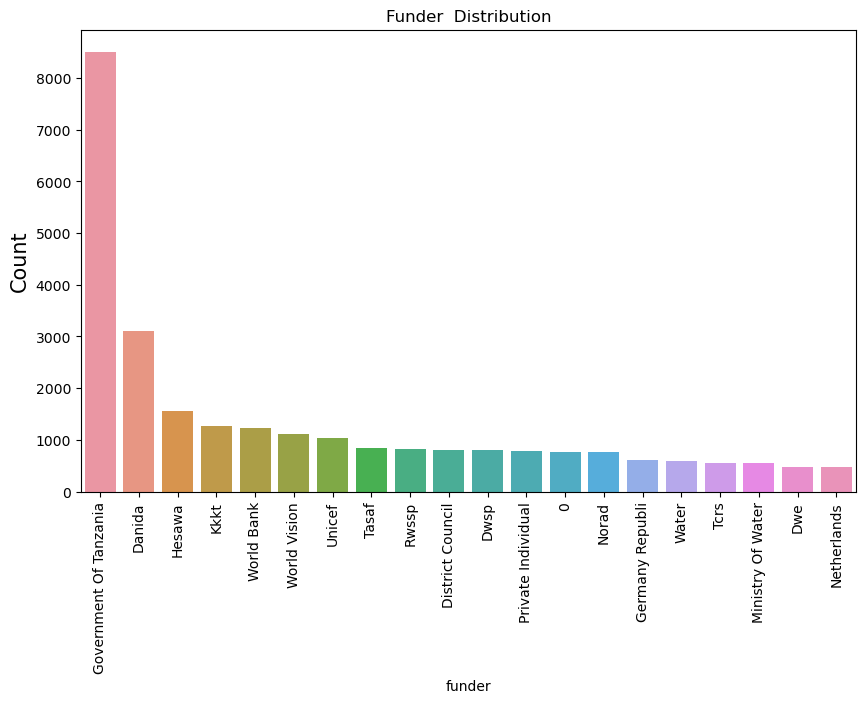

In [40]:
plot_data(df, 'funder', 'Funder  Distribution')

From the above, Tanzanian Goverment is the greatest funder. Also from the distribution we have a funder "0" which we shall treat as unknown.

In [41]:
# Replacing 0 with unknown
df['funder'].replace({np.nan: 'Unknown', '0': 'Unknown'}, inplace=True)

#### Installer Distribution

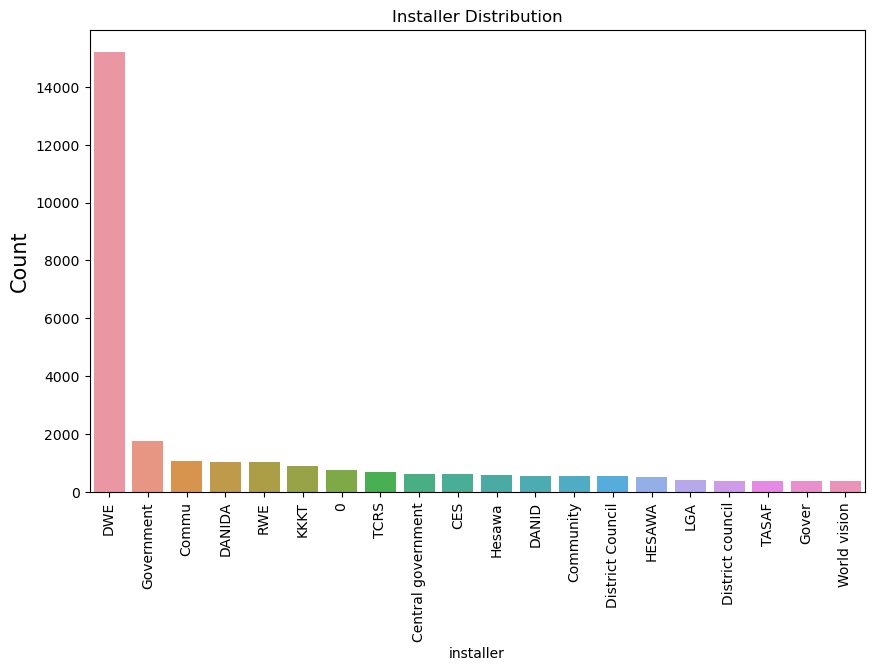

In [42]:
plot_data(df, 'installer', 'Installer Distribution')

DWE has done the most installation. We also can see there is a in staller called '0' which we shall treat as unknown

In [43]:
# Replacing 0 with unknown
df['installer'].replace({np.nan: 'Unknown', '0': 'Unknown'}, inplace=True)

#### Region Distribution

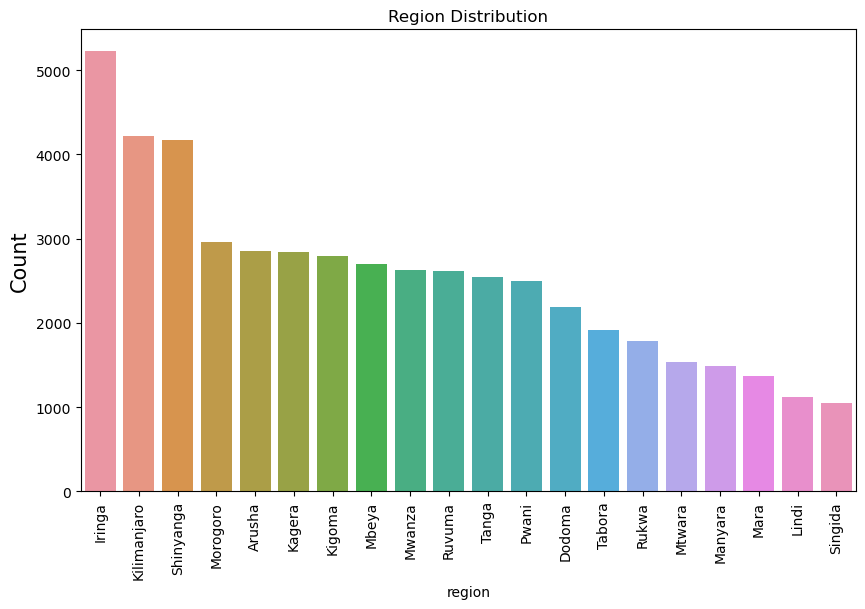

In [44]:
plot_data(df, 'region', 'Region Distribution')

Most wells are in the iringa region.

In [45]:
df.columns

Index(['id', 'amount_tsh', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'basin', 'region', 'lga', 'population', 'scheme_management',
       'permit', 'construction_year', 'extraction_type', 'management',
       'payment_type', 'water_quality', 'quantity', 'source',
       'waterpoint_type', 'status_group'],
      dtype='object')

#### Local Government Authority Distribution

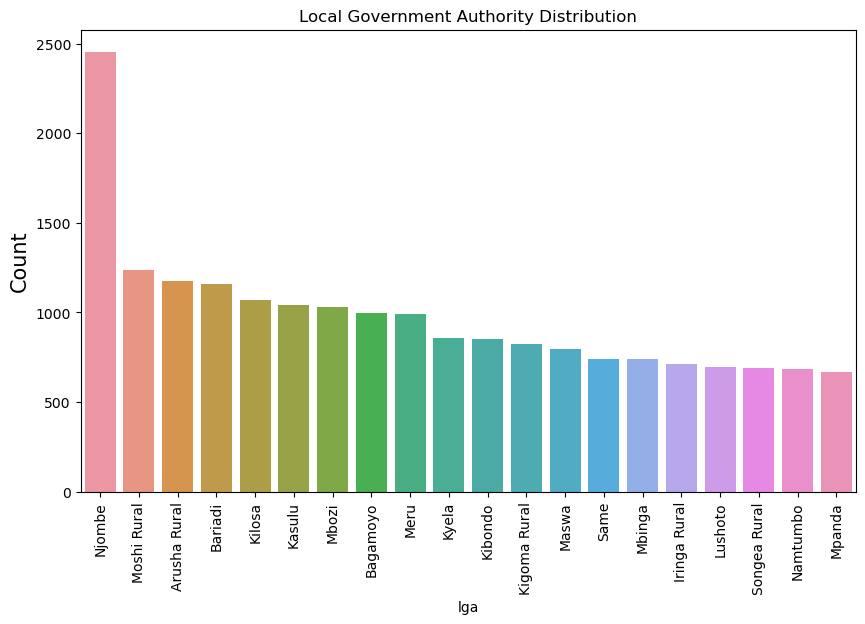

In [46]:
plot_data(df,'lga', 'Local Government Authority Distribution')

Most Wells are within Njombe Area.

#### Extraction Type Distribution

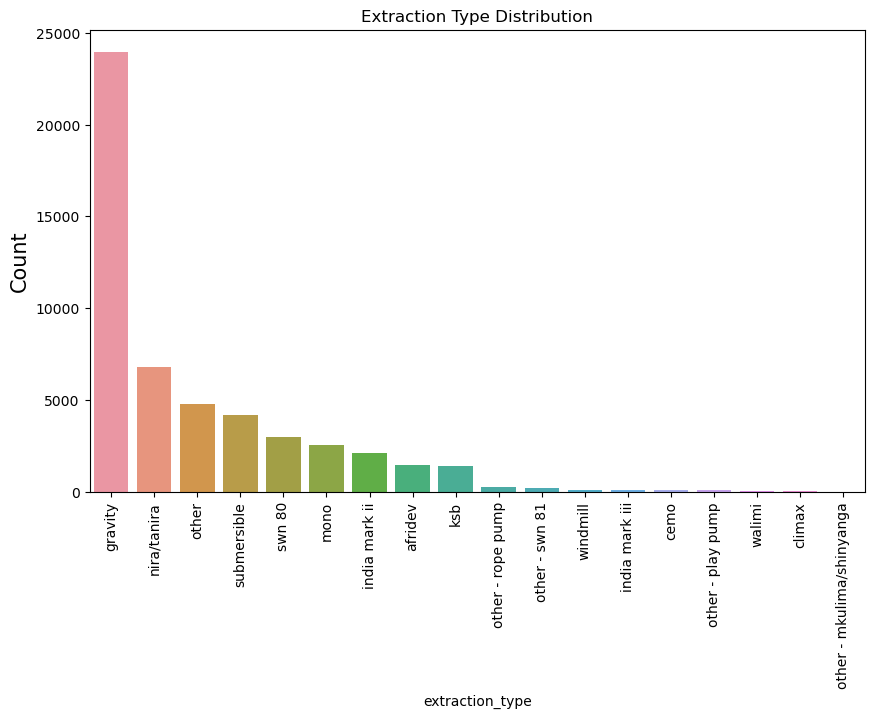

In [47]:
plot_data(df, 'extraction_type', 'Extraction Type Distribution')

Gravity is the most common extraction type according to the distribution.

#### Payment Type Distribution


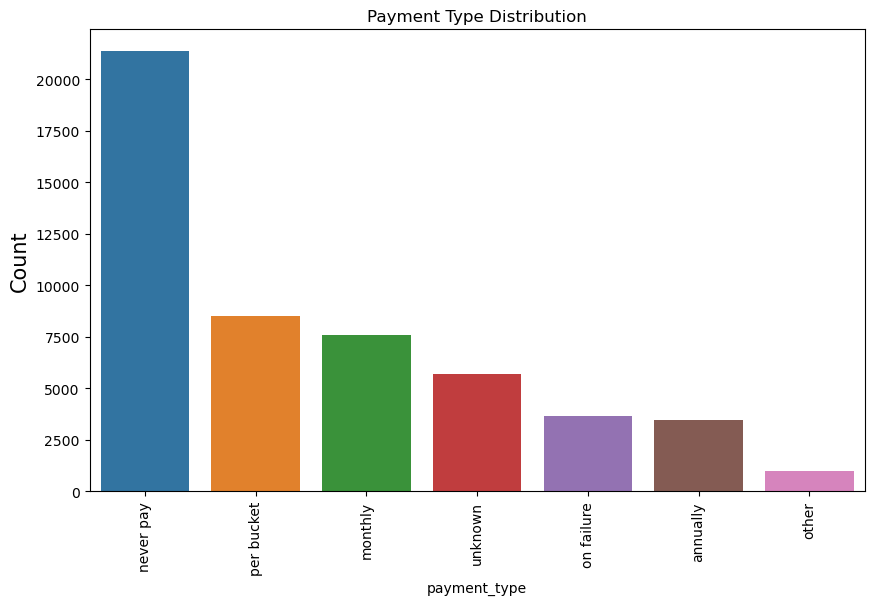

In [48]:
plot_data(df, 'payment_type', 'Payment Type Distribution')

Most of the wells do not require payment to access water.

#### Water Quality Distribution

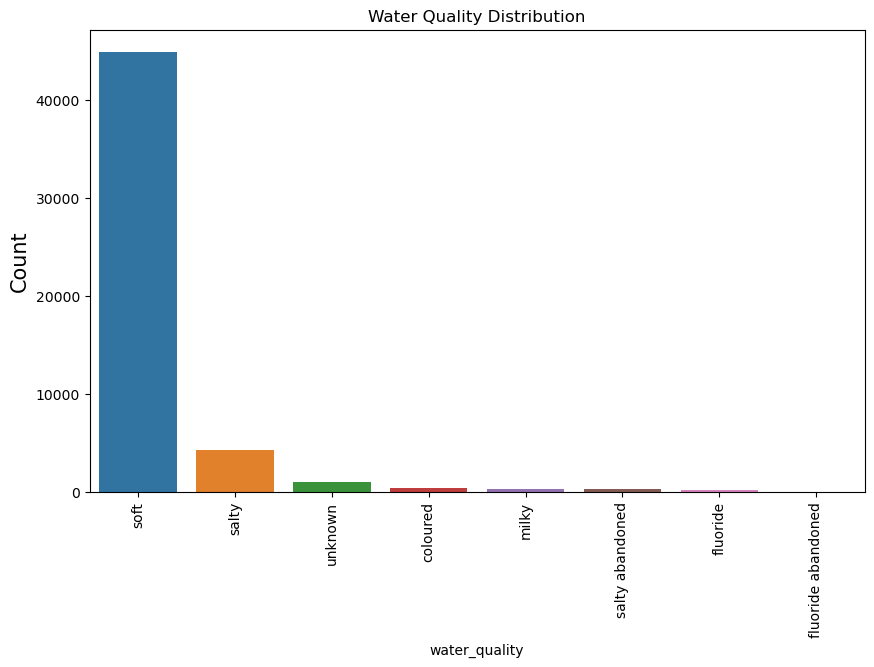

In [49]:
plot_data(df, 'water_quality', 'Water Quality Distribution')

Most Wells have soft water.

#### Source Distribution

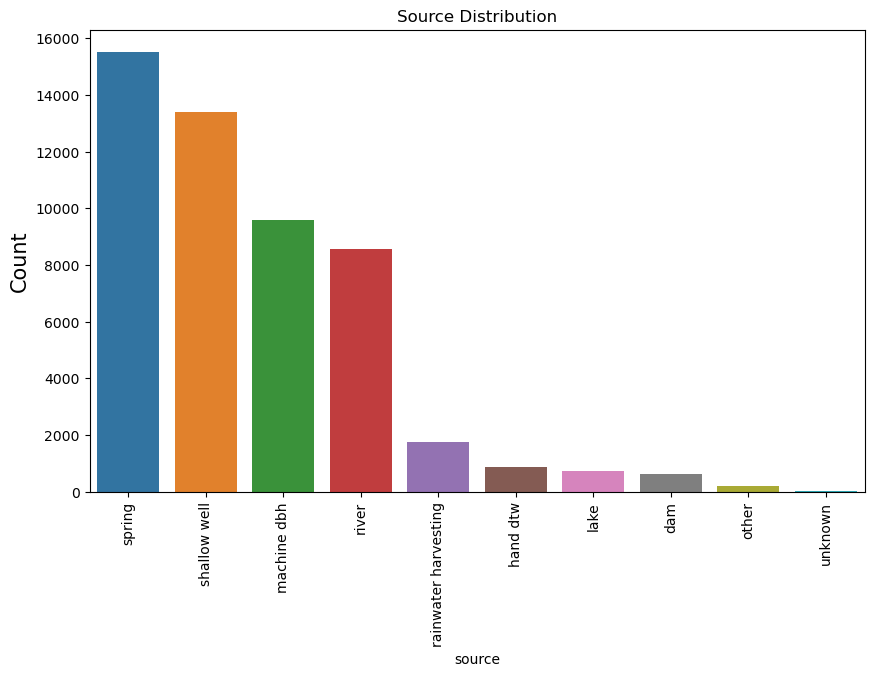

In [50]:
plot_data(df,'source', 'Source Distribution')

Most Water sources are springs

#### Population Distribution

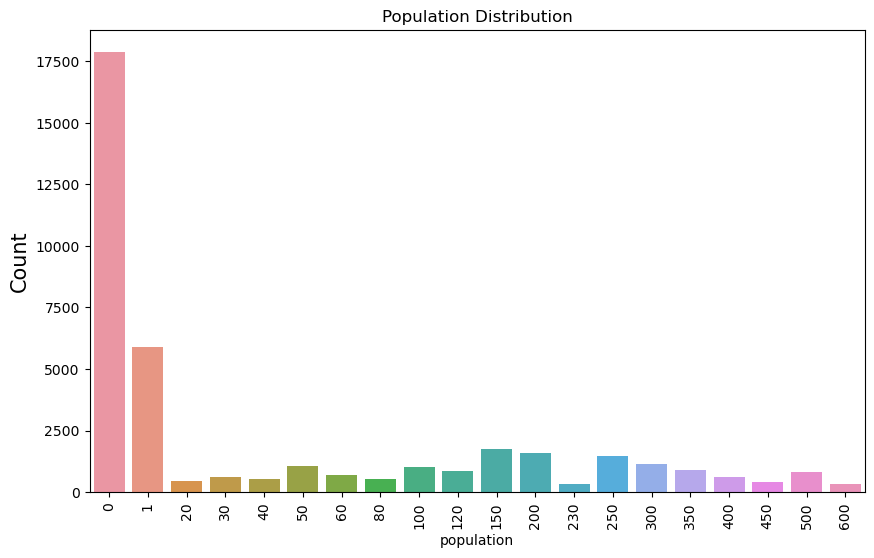

In [51]:
plot_data(df,'population', 'Population Distribution')

From the distribution above, it is evident that most wells have no people around them. This indicates that the majority of people obtain water through other means rather than directly from the well.

#### Management Distribution

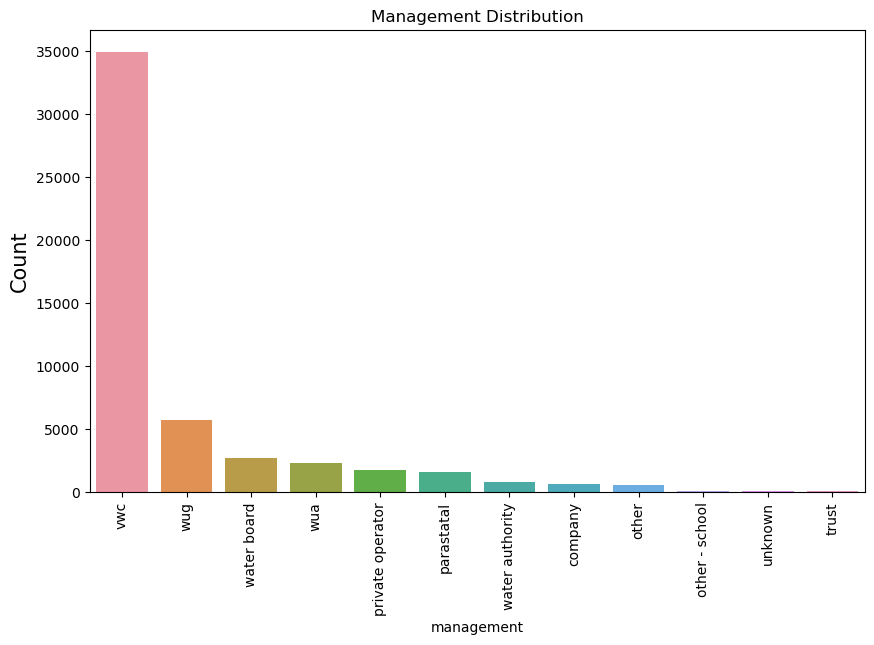

In [52]:
plot_data(df,'management', 'Management Distribution')

The distribution above indicates that vwc manages most waterpoints.

#### Status Group Distribution

In [53]:
def plot_data(df, column, title):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Getting the value counts and convert them to percentages
    counts = df[column].value_counts(normalize=True) * 100
    
    # Plot the top 20 most frequent values as percentages
    sns.barplot(x=counts.head(20).index, y=counts.head(20).values, ax=ax)
    
    # Set the title and labels
    ax.set_title(title)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_ylabel('Percentage', fontsize=15)
    ax.set_xlabel(column, fontsize=15)
    
    # Show the plot
    plt.show()

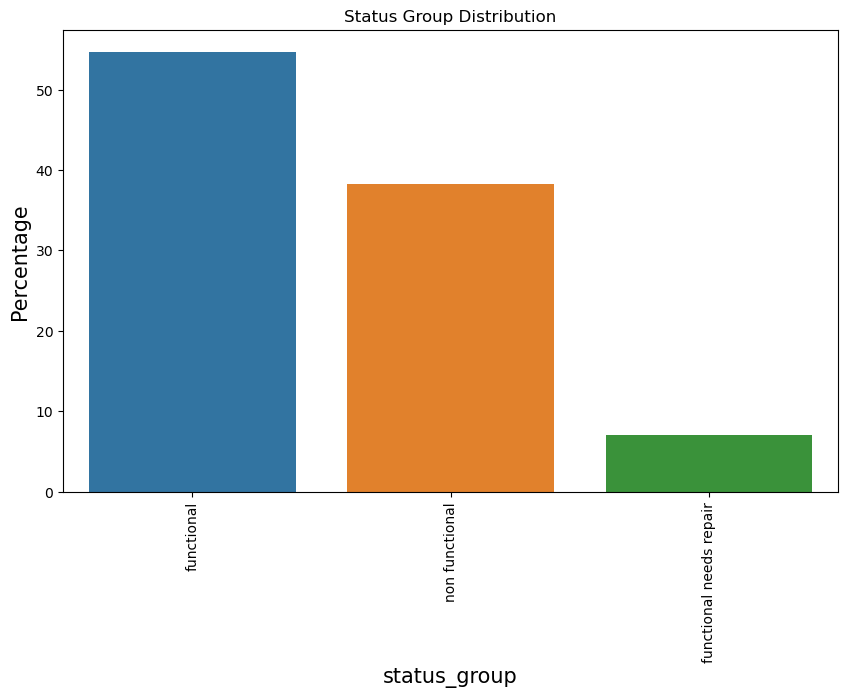

In [54]:
plot_data(df,'status_group', 'Status Group Distribution')

Based on the distribution, about 55% of the water points are functional, 38% are non-functional, and 7% are functional but require repairs.

## Bivariate Analysis

#### Water Point Status by Region

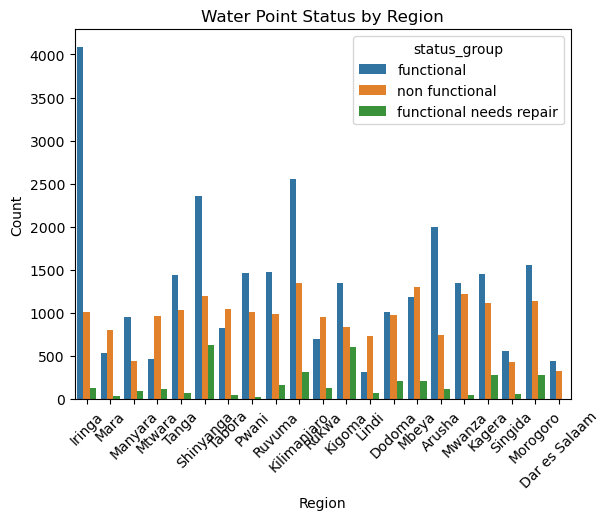

In [55]:
# Visualization
sns.countplot(data=df, x='region', hue='status_group')
plt.title('Water Point Status by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Based on the distribution, Iringa has the highest number of functional water points, Ruvuma has the most non-functional water points, and Tanga has the most water points that need repair.

#### 'Water Point Status by Waterpoint Type

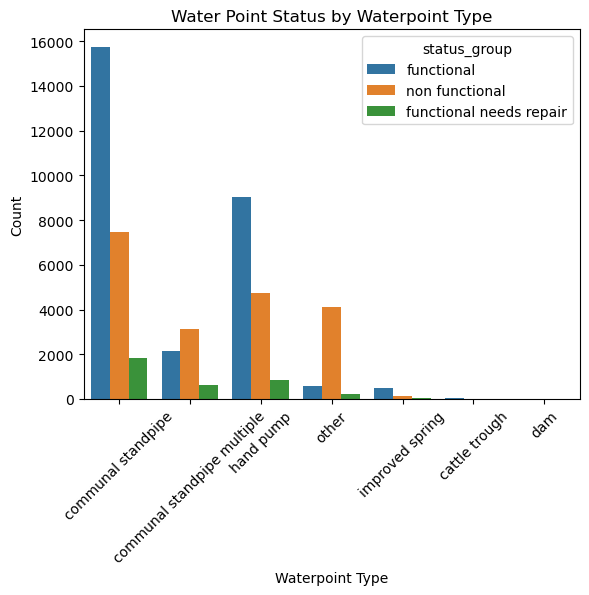

In [56]:
# Visualization
sns.countplot(data=df, x='waterpoint_type', hue='status_group')
plt.title('Water Point Status by Waterpoint Type')
plt.xlabel('Waterpoint Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

From the distribution, there is communal standpipe and communal standpipe multiple, for the sake of this analysis We shall treat this as the same and plot the distribution again

In [57]:
df['waterpoint_type'].replace('communal standpipe multiple', 'communal standpipe', inplace=True)

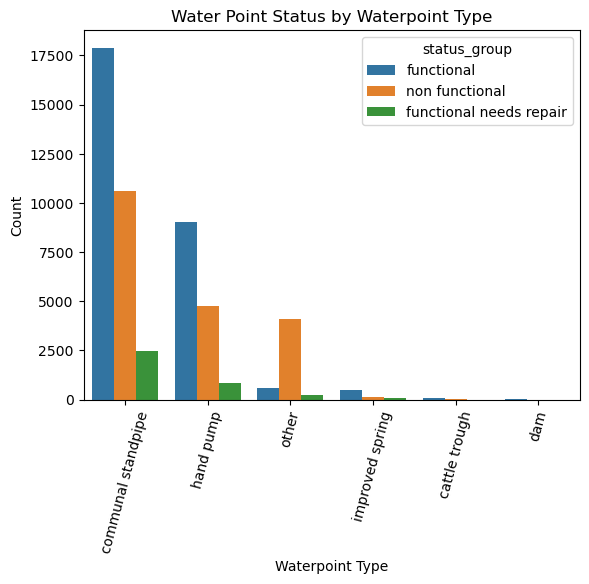

In [58]:
sns.countplot(data=df, x='waterpoint_type', hue='status_group')
plt.title('Water Point Status by Waterpoint Type')
plt.xlabel('Waterpoint Type')
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.show()

####  GPS Height vs. Amount TSH

Pearson correlation: 0.08710911836363372


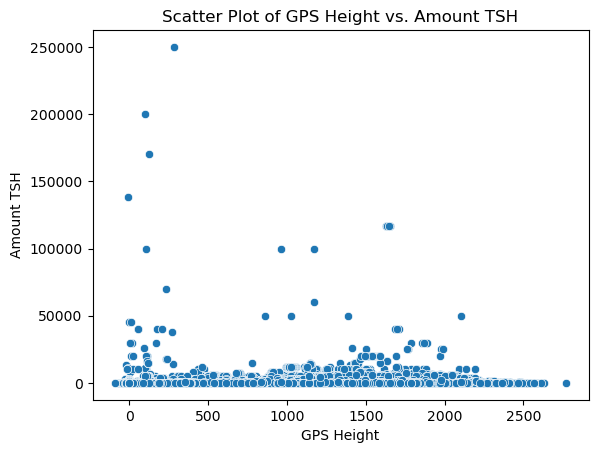

In [59]:
correlation = df['gps_height'].corr(df['amount_tsh'])
print(f"Pearson correlation: {correlation}")

# Visualization
sns.scatterplot(data=df, x='gps_height', y='amount_tsh')
plt.title('Scatter Plot of GPS Height vs. Amount TSH')
plt.xlabel('GPS Height')
plt.ylabel('Amount TSH')
plt.show()

 The Pearson Correlation of 0.087109  indicates a very weak positive correlation between gps_height and amount_tsh. This implies that elevation alone might not be a significant factor in determining the water available from a water source.

#### Extraction type vs. Status_group

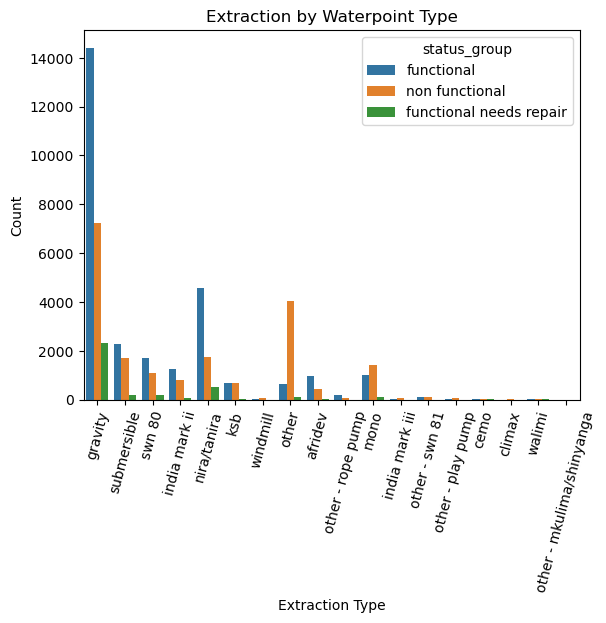

In [60]:
sns.countplot(data=df, x='extraction_type', hue='status_group')
plt.title('Extraction by Waterpoint Type')
plt.xlabel('Extraction Type')
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.show()

#### Management vs Status Group

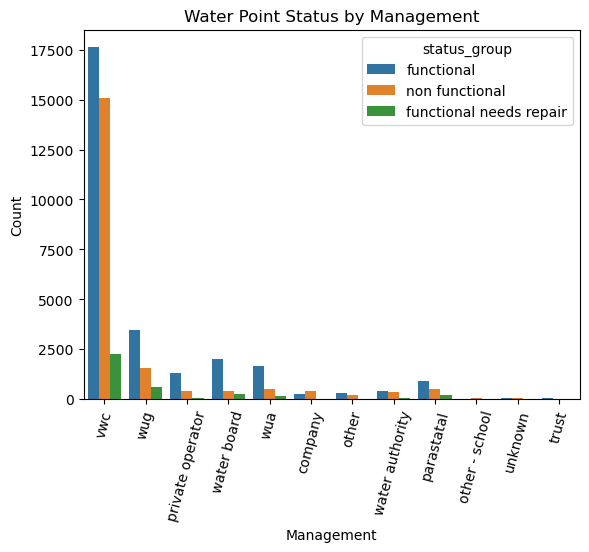

In [61]:
sns.countplot(data=df, x='management', hue='status_group')
plt.title('Water Point Status by Management')
plt.xlabel('Management')
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.show()

Most waterpoints are managed by vwc. 

In [62]:
df.columns

Index(['id', 'amount_tsh', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'basin', 'region', 'lga', 'population', 'scheme_management',
       'permit', 'construction_year', 'extraction_type', 'management',
       'payment_type', 'water_quality', 'quantity', 'source',
       'waterpoint_type', 'status_group'],
      dtype='object')

#### Basin vs Status Group

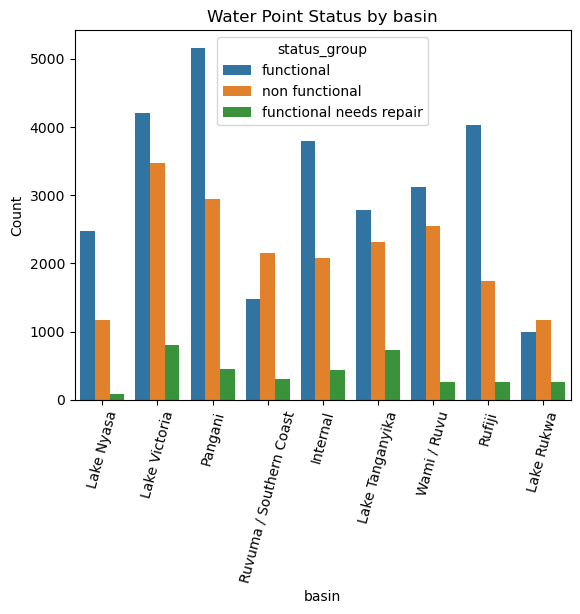

In [63]:
sns.countplot(data=df, x='basin', hue='status_group')
plt.title('Water Point Status by basin')
plt.xlabel('basin')
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.show()

This data indicates that Pangani has the highest number of operational water points, while Lake Victoria has the highest number of non-functional water points as well as those requiring repair.

#### Payment Type Vs Status Group

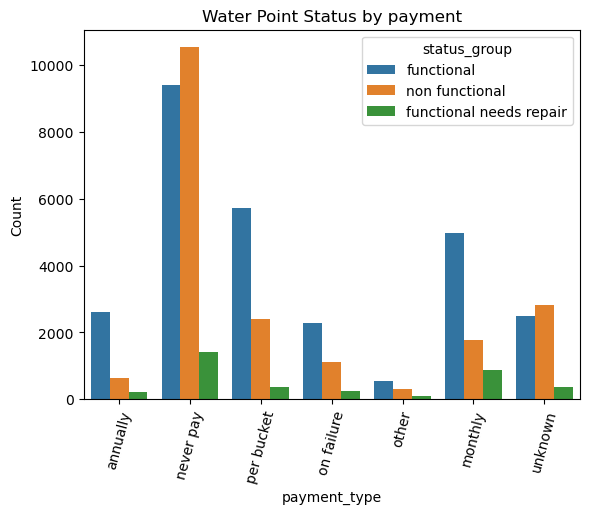

In [64]:
sns.countplot(data=df, x='payment_type', hue='status_group')
plt.title('Water Point Status by payment')
plt.xlabel('payment_type')
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.show()

The water points lacking payment records exhibit the highest proportion of non-functional status.

#### Water Quality vs Status Group

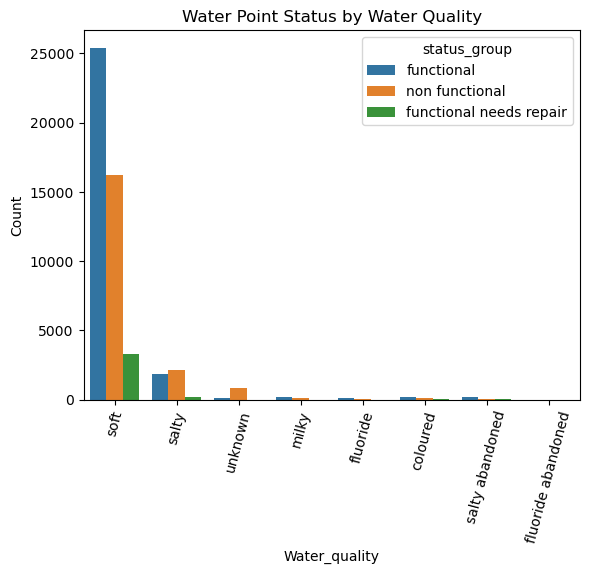

In [65]:
sns.countplot(data=df, x='water_quality', hue='status_group')
plt.title('Water Point Status by Water Quality')
plt.xlabel('Water_quality')
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.show()

Most fucntional waterpoints have soft water. 

#### Quantity Vs Status Group

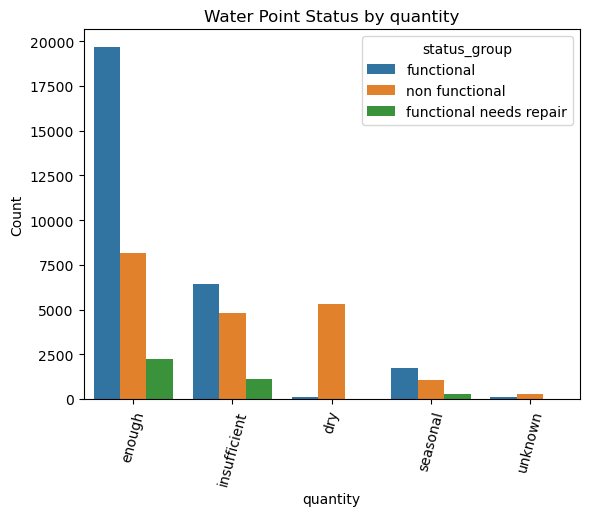

In [66]:
#Plotting
sns.countplot(data=df, x='quantity', hue='status_group')
plt.title('Water Point Status by quantity')
plt.xlabel('quantity')
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.show()

Functional water points generally have sufficient water, yet a considerable number of non-functional ones and those in need of repair also exhibit adequate water supply.

#### Waterpoint Age Vs Status Group 
We start with feature engineering the Age column and then plot Age Vs Functionality to see whether age influences the functionality of the waterpoin.

In [79]:
# Plotting barplot of average waterpoint age for each status group
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='status_group', y='waterpoint_age', estimator=np.mean)
plt.title('Average Waterpoint Age vs Status Group')
plt.xlabel('Status Group')
plt.ylabel('Average Waterpoint Age')
plt.show()

ValueError: Could not interpret input 'waterpoint_age'

<Figure size 1000x600 with 0 Axes>

#####  Longtitude vs Latitude 

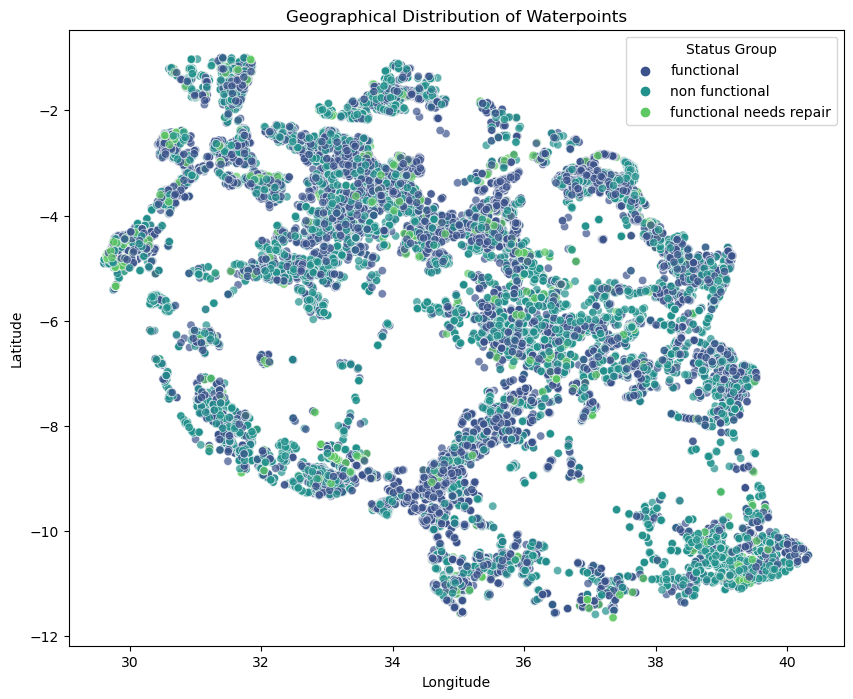

In [68]:
# Exclude longitude values equal to zero
df_filtered = df[df['longitude'] != 0]

# Plot the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_filtered, x='longitude', y='latitude', hue='status_group', palette='viridis', alpha=0.7)
plt.title('Geographical Distribution of Waterpoints')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Status Group')
plt.show()

This shows the geographical distribution of the waterpoints.

In [69]:
df.columns

Index(['id', 'amount_tsh', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'basin', 'region', 'lga', 'population', 'scheme_management',
       'permit', 'construction_year', 'extraction_type', 'management',
       'payment_type', 'water_quality', 'quantity', 'source',
       'waterpoint_type', 'status_group'],
      dtype='object')

## Multivariate Analysis

In [ ]:
selected_numerical_columns = ['amount_tsh', 'gps_height', 'longitude', 'latitude', 'population', 'construction_year']
sns.pairplot(df, vars=selected_numerical_columns, hue='status_group')
plt.suptitle('Pair Plots of Selected Numerical Columns by Water Well Status', y=1.02)
plt.show()

C:\Users\HP 430\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP 430\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP 430\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP 430\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

#### Multivariate Regression

In [70]:
import statsmodels.api as sm
# Selecting features and target variable
features = df[['amount_tsh', 'gps_height', 'longitude', 'latitude', 'population', 'construction_year']]
target = df['status_group'].apply(lambda x: 1 if x == 'functional' else 0)  # Assuming binary classification for simplicity

# Adding a constant for the intercept
features = sm.add_constant(features)

# Fitting the model
model = sm.Logit(target, features).fit()

# Printing the summary
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.675395
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           status_group   No. Observations:                51280
Model:                          Logit   Df Residuals:                    51273
Method:                           MLE   Df Model:                            6
Date:                Wed, 22 May 2024   Pseudo R-squ.:                 0.01937
Time:                        20:03:56   Log-Likelihood:                -34634.
converged:                       True   LL-Null:                       -35318.
Covariance Type:            nonrobust   LLR p-value:                1.636e-292
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.2199      0.047     -4.710      0.000      -0.311      -0.128
amount_t

#### Correlation Matrix

In [73]:
# Assuming your DataFrame is named 'df'
correlation_matrix = df[['amount_tsh', 'gps_height', 'longitude', 'latitude', 'population', 'construction_year']].corr()
print(correlation_matrix)

                   amount_tsh  gps_height  longitude  latitude  population  \
amount_tsh           1.000000    0.087109   0.024593 -0.068407    0.016469   
gps_height           0.087109    1.000000   0.152819 -0.115550    0.122368   
longitude            0.024593    0.152819   1.000000 -0.431184    0.079686   
latitude            -0.068407   -0.115550  -0.431184  1.000000   -0.041953   
population           0.016469    0.122368   0.079686 -0.041953    1.000000   
construction_year    0.077846    0.649768   0.404834 -0.311839    0.250472   

                   construction_year  
amount_tsh                  0.077846  
gps_height                  0.649768  
longitude                   0.404834  
latitude                   -0.311839  
population                  0.250472  
construction_year           1.000000  


### Heatmap

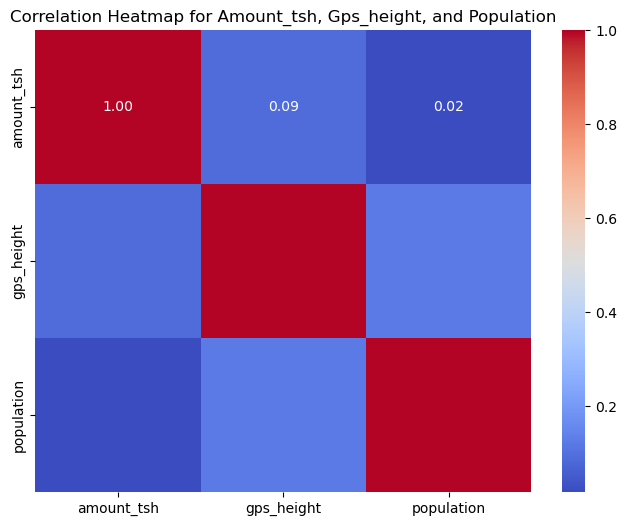

In [135]:
# Computing the correlation matrix for numerical variables 'amount_tsh', 'gps_height', and 'population'
numerical_columns = ['amount_tsh', 'gps_height', 'population']
correlation_matrix = df[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Amount_tsh, Gps_height, and Population')
plt.show()

## Data Preprocessing

##### Feature Importance

In [76]:
#Function to preprocess data
def preprocess_data(df):
    # Define numerical and categorical columns
    numerical_cols = ['amount_tsh', 'gps_height', 'population']
    categorical_cols = ['funder', 'installer', 'region', 'scheme_management', 'extraction_type', 'management', 'payment_type', 'water_quality', 'quantity', 'source', 'waterpoint_type']

    # Preprocessing pipelines for numerical and categorical data
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Combine numerical and categorical transformers into a ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ]
    )

    # Separate target variable and features
    X = df.drop('status_group', axis=1)
    y = df['status_group']

    # Preprocess the data
    X_processed = preprocessor.fit_transform(X)

    return X_processed, y

In [77]:
df.columns

Index(['id', 'amount_tsh', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'basin', 'region', 'lga', 'population', 'scheme_management',
       'permit', 'construction_year', 'extraction_type', 'management',
       'payment_type', 'water_quality', 'quantity', 'source',
       'waterpoint_type', 'status_group'],
      dtype='object')

## Modeling 

Our objectives are to deliver thorough and practical insights that will inform strategic investments and enhance the performance of wells in Tanzania. We will start with data preprocessing and then apply the following algorithms:

    Logistic
    Decision Tree
    Random Forest
    Gradient Boosting
    XGBoost 
   

#### Logistic Regression

In [81]:
# Function to train a Logistic Regression model
def train_model(X_train, y_train):
    model = LogisticRegression(max_iter=1000)  # Increased max_iter to ensure convergence
    model.fit(X_train, y_train)
    return model

# Function to evaluate a model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    return accuracy, precision, recall, f1, conf_matrix, class_report


# Preprocess data
X_processed, y = preprocess_data(df)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model
model = train_model(X_train, y_train)

# Evaluate the model
accuracy, precision, recall, f1, conf_matrix, class_report = evaluate_model(model, X_test, y_test)

##### Model Evaluation

In [83]:
# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.7730109204368175
Precision: 0.7651272697376988
Recall: 0.7730109204368175
F1 Score: 0.7579306893391036
Confusion Matrix:
[[5007   56  538]
 [ 476  118  113]
 [1102   43 2803]]
Classification Report:
                         precision    recall  f1-score   support

             functional       0.76      0.89      0.82      5601
functional needs repair       0.54      0.17      0.26       707
         non functional       0.81      0.71      0.76      3948

               accuracy                           0.77     10256
              macro avg       0.71      0.59      0.61     10256
           weighted avg       0.77      0.77      0.76     10256



The model performs well overall with an accuracy of 77.30%, indicating it correctly classifies the majority of the instances. However, it struggles with the 'functional needs repair' class, as shown by the lower precision, recall, and F1-score for this class.

The Decision Tree Classifier performs reasonably well with an accuracy of around 76.8%.
It is good at predicting the 'functional' and 'non functional' classes with fairly high precision and recall.
The model struggles significantly with the 'functional needs repair' class, as indicated by its low precision (0.42) and recall (0.37). This suggests that the model often misclassifies waterpoints that need repair.
The confusion matrix shows a substantial number of misclassifications between 'functional' and 'non functional', indicating these classes might have overlapping features that are challenging for the model to differentiate.

#### Random Forest

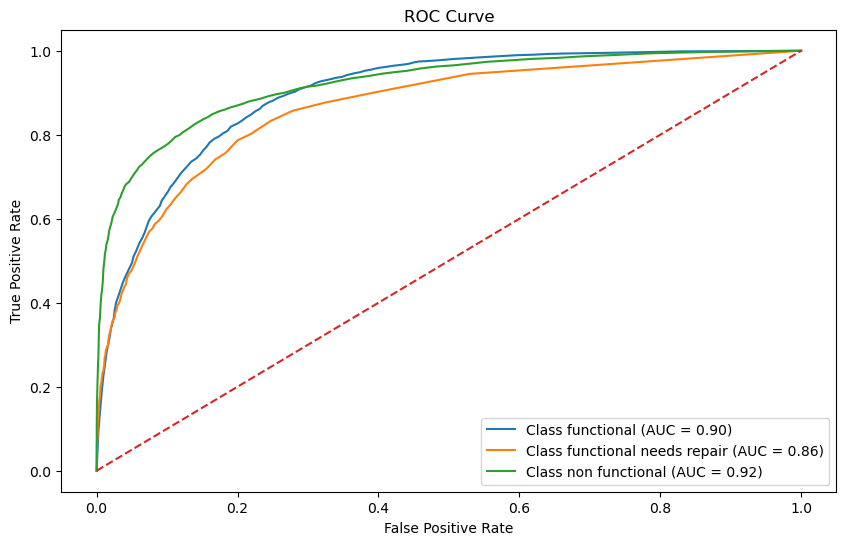

In [95]:
# Function to train a Random Forest model without Grid Search
def train_model(X_train, y_train):
    model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
    model.fit(X_train, y_train)
    return model

# Function to evaluate a model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Compute ROC AUC for each class
    auc_dict = {}
    for i in range(len(model.classes_)):
        class_i_mask = (y_test == model.classes_[i])
        if np.sum(class_i_mask) > 0:
            auc_dict[f'Class {model.classes_[i]}'] = roc_auc_score(class_i_mask, y_prob[:, i])
        else:
            auc_dict[f'Class {model.classes_[i]}'] = 'Undefined (only one class present)'

    # Plot ROC curve for each class
    plt.figure(figsize=(10, 6))
    for i in range(len(model.classes_)):
        class_i_mask = (y_test == model.classes_[i])
        if np.sum(class_i_mask) > 0:
            fpr, tpr, _ = roc_curve(class_i_mask, y_prob[:, i])
            plt.plot(fpr, tpr, label=f'Class {model.classes_[i]} (AUC = {auc_dict[f"Class {model.classes_[i]}"]:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    return accuracy, precision, recall, f1, auc_dict, conf_matrix, class_report

# Preprocess data (assuming preprocess_data function is already defined)
X_processed, y = preprocess_data(df)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = train_model(X_train, y_train)

# Evaluate the model
accuracy, precision, recall, f1, auc_dict, conf_matrix, class_report = evaluate_model(model, X_test, y_test)

##### Model Evaluation

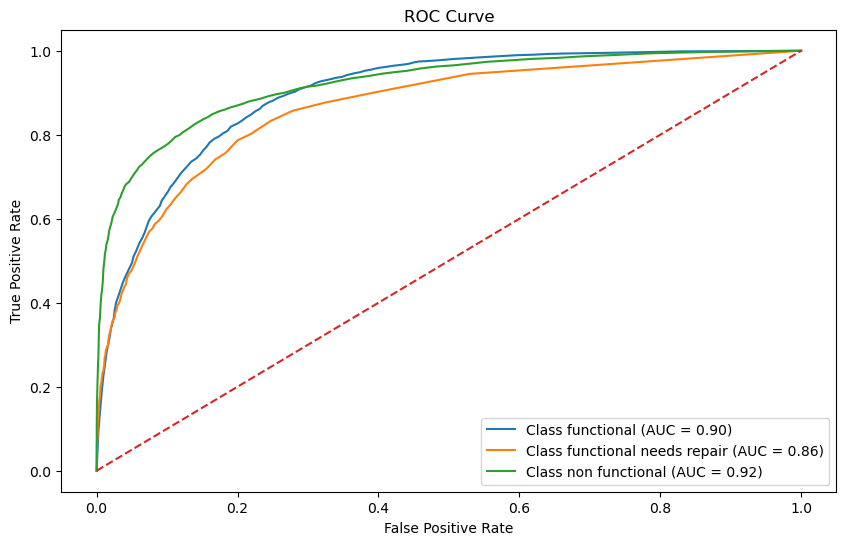

Random Forest Accuracy: 0.8038221528861155
Precision: 0.7977331410514492
Recall: 0.8038221528861155
F1 Score: 0.7987102844620978
AUC: {'Class functional': 0.8978929648706662, 'Class functional needs repair': 0.8649858253632015, 'Class non functional': 0.9207624169691083}
Confusion Matrix:
[[4906  167  528]
 [ 342  250  115]
 [ 800   60 3088]]
Classification Report:
                         precision    recall  f1-score   support

             functional       0.81      0.88      0.84      5601
functional needs repair       0.52      0.35      0.42       707
         non functional       0.83      0.78      0.80      3948

               accuracy                           0.80     10256
              macro avg       0.72      0.67      0.69     10256
           weighted avg       0.80      0.80      0.80     10256



In [96]:
# Evaluate the model
accuracy, precision, recall, f1, auc, conf_matrix, class_report = evaluate_model(model, X_test, y_test)

# Print evaluation results
print(f"Random Forest Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC: {auc}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

The model performs well overall, with high accuracy, precision, recall, and F1 scores, especially for "functional" and "non functional" classes.
The AUC scores show that the model is good at distinguishing between the different classes.
There is some difficulty in correctly identifying "functional needs repair" samples, which might indicate a need for further tuning or more data for that class.

#### Gradient Boosting Classifier

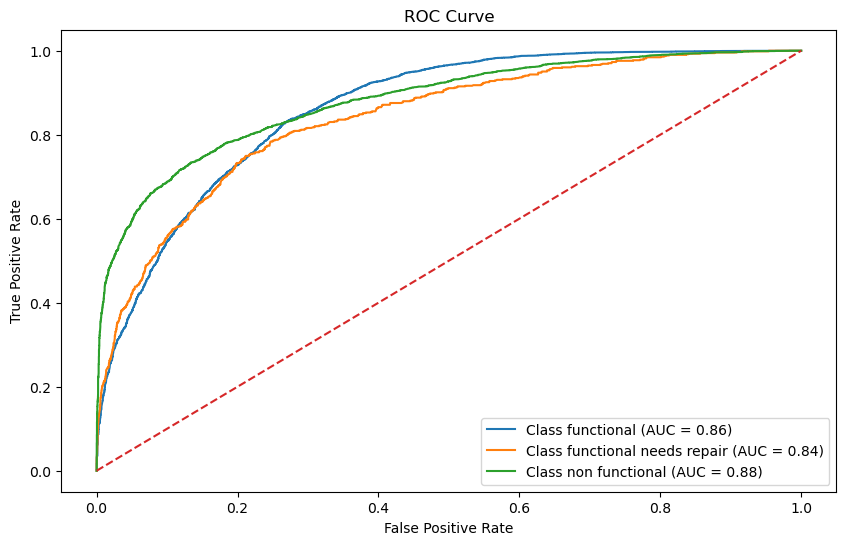

In [97]:
# Function to train a Gradient Boosting model
def train_model_gb(X_train, y_train):
    model = GradientBoostingClassifier(random_state=42)
    model.fit(X_train, y_train)
    return model


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Train the Gradient Boosting model
model_gb = train_model_gb(X_train, y_train)

# Evaluate the Gradient Boosting model
accuracy_gb, precision_gb, recall_gb, f1_gb, auc_gb, conf_matrix_gb, class_report_gb = evaluate_model(model_gb, X_test, y_test)

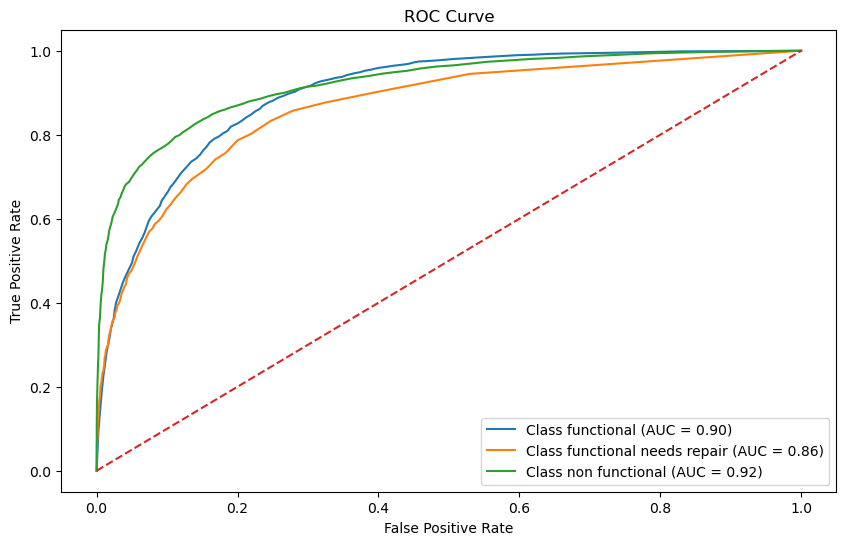

Accuracy: 0.8038221528861155
Precision: 0.7977331410514492
Recall: 0.8038221528861155
F1 Score: 0.7987102844620978
AUC: {'Class functional': 0.8978929648706662, 'Class functional needs repair': 0.8649858253632015, 'Class non functional': 0.9207624169691083}
Confusion Matrix:
[[4906  167  528]
 [ 342  250  115]
 [ 800   60 3088]]
Classification Report:
                         precision    recall  f1-score   support

             functional       0.81      0.88      0.84      5601
functional needs repair       0.52      0.35      0.42       707
         non functional       0.83      0.78      0.80      3948

               accuracy                           0.80     10256
              macro avg       0.72      0.67      0.69     10256
           weighted avg       0.80      0.80      0.80     10256



In [98]:
# Evaluate the model
accuracy, precision, recall, f1, auc, conf_matrix, class_report = evaluate_model(model, X_test, y_test)

# Print evaluation results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC: {auc}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

The Gradient Boosting Classifier performs reasonably well with an overall accuracy of approximately 80.38%%.
It shows recall (0.804) and good precision (0.797) for the 'functional' class, indicating strong performance in identifying functional waterpoints correctly. The confusion matrix shows that the model correctly identifies some wells in need of repair (250 out of 707), although there are instances of misclassifications
The model struggles with the 'functional needs repair' class. This suggests difficulties in accurately predicting waterpoints that need repair.
The macro average scores indicate a lower performance for 'functional needs repair' significantly affects the overall metrics.

We shall need to Improve Classification for 'Functional Needs Repair' and we shall use Model ensemble

#### XGBoostClassifier

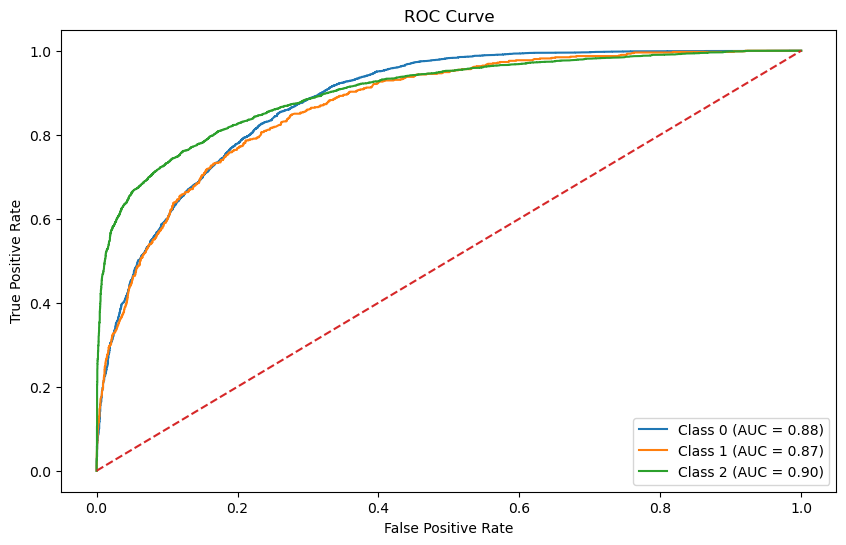

Accuracy: 0.7867589703588144
Precision: 0.788633845682592
Recall: 0.7867589703588144
F1 Score: 0.7724406454477941
AUC: {'Class 0': 0.8828853256409829, 'Class 1': 0.8698941794004365, 'Class 2': 0.9028476929635035}
Confusion Matrix:
[[5197   61  343]
 [ 464  151   92]
 [1196   31 2721]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.93      0.83      5601
           1       0.62      0.21      0.32       707
           2       0.86      0.69      0.77      3948

    accuracy                           0.79     10256
   macro avg       0.75      0.61      0.64     10256
weighted avg       0.79      0.79      0.77     10256



In [115]:
# Instantiate XGBClassifier
clf = xgb.XGBClassifier(random_state=42)

# Fit XGBClassifier
clf.fit(X_train, y_train_encoded)

# Predict on test set
test_preds = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test_encoded, test_preds)
precision = precision_score(y_test_encoded, test_preds, average='weighted')
recall = recall_score(y_test_encoded, test_preds, average='weighted')
f1 = f1_score(y_test_encoded, test_preds, average='weighted')

# Compute ROC AUC for each class
auc_dict = {}
for i in range(len(clf.classes_)):
    class_i_mask = (y_test_encoded == clf.classes_[i])
    if np.sum(class_i_mask) > 0:
        auc_dict[f'Class {clf.classes_[i]}'] = roc_auc_score(class_i_mask, y_prob[:, i])
    else:
        auc_dict[f'Class {clf.classes_[i]}'] = 'Undefined (only one class present)'

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_encoded, test_preds)

# Classification Report
class_report = classification_report(y_test_encoded, test_preds)

# Plot ROC curve for each class
plt.figure(figsize=(10, 6))
for i in range(len(clf.classes_)):
    class_i_mask = (y_test_encoded == clf.classes_[i])
    if np.sum(class_i_mask) > 0:
        fpr, tpr, _ = roc_curve(class_i_mask, y_prob[:, i])
        plt.plot(fpr, tpr, label=f'Class {clf.classes_[i]} (AUC = {auc_dict[f"Class {clf.classes_[i]}"]:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('AUC:', auc_dict)
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

The model achieved an accuracy of approximately 78.68%, with precision and recall around 78.86% and 78.68% respectively. The F1 score, a balance between precision and recall, was approximately 77.24%. AUC scores for each class ranged from 0.88 to 0.90, indicating reasonable performance in distinguishing between different well statuses. The confusion matrix revealed both correct predictions and misclassifications. Class-specific metrics in the classification report highlighted varying precision, recall, and F1 scores across the three classes. Overall, while the model showed promise in identifying well statuses, particularly functional wells, there's room for improvement, especially in correctly identifying wells in need of repair. 

##### Handling Class Imbalance, Retrain the Model and Evaluation. 

In [116]:

# Preprocess data (assuming this function is defined earlier)
X_processed, y = preprocess_data(df)

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_encoded, test_size=0.2, random_state=42)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Calculate class weights
class_weights = {i: len(y_resampled) / sum(y_resampled == i) for i in range(len(label_encoder.classes_))}

# Train the XGBoost model with class weights
model = XGBClassifier(scale_pos_weight=class_weights[1])
model.fit(X_resampled, y_resampled)

# Evaluate the model
y_pred = model.predict(X_test)

# Convert predictions back to original labels for interpretation
y_pred_labels = label_encoder.inverse_transform(y_pred)
y_test_labels = label_encoder.inverse_transform(y_test)

conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
class_report = classification_report(y_test_labels, y_pred_labels)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

C:\Users\HP 430\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [22:59:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix:
[[4518  612  471]
 [ 246  392   69]
 [ 905  255 2788]]

Classification Report:
                         precision    recall  f1-score   support

             functional       0.80      0.81      0.80      5601
functional needs repair       0.31      0.55      0.40       707
         non functional       0.84      0.71      0.77      3948

               accuracy                           0.75     10256
              macro avg       0.65      0.69      0.66     10256
           weighted avg       0.78      0.75      0.76     10256



The results from this model model shows a significant improvement in identifying the "functional needs repair" class, Recall: At 0.55, the recall for this class has improved, meaning the model is now identifying more of the actual "functional needs repair" instances but this can be improved.
We shall do Hyperparameter tuning and use Grid Search to improve the model.

#### Model Ensemble

In [118]:
 #Instantiate individual classifiers
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
lr_clf = LogisticRegression(random_state=42)

# Create a Voting Classifier with hard voting
voting_clf = VotingClassifier(estimators=[('rf', rf_clf), ('gb', gb_clf), ('lr', lr_clf)], voting='hard')

# Fit the ensemble classifier
voting_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = voting_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate other metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

C:\Users\HP 430\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7847113884555382
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.93      0.83      5601
           1       0.67      0.16      0.26       707
           2       0.86      0.69      0.77      3948

    accuracy                           0.78     10256
   macro avg       0.76      0.59      0.62     10256
weighted avg       0.79      0.78      0.77     10256

Confusion Matrix:
[[5212   34  355]
 [ 505  115   87]
 [1204   23 2721]]


Class 0 (functional): 5212 instances were correctly classified as functional, 34 were incorrectly classified as functional needs repair, and 355 were incorrectly classified as non-functional.
Class 1 (functional needs repair): 505 instances were correctly classified as functional needs repair, 115 were incorrectly classified as functional, and 87 were incorrectly classified as non-functional.
Class 2 (non-functional): 1204 instances were correctly classified as non-functional, 23 were incorrectly classified as functional, and 2721 were incorrectly classified as functional

### Validation

In [ ]:
#Load the first dataset
data1 = pd.read_csv('Downloads/Training Set Values.csv')  # Adjust the file path

# 2. Load the second dataset
data2 = pd.read_csv('Downloads/Training_set_labels.csv')  # Adjust the file path

# 3. Concatenate or merge the two datasets
combined_data = pd.concat([data1, data2], ignore_index=True)  # Concatenate along rows

# 4. Separate the features from the target variable if necessary
X_test_combined = combined_data.drop('status_group')  # Adjust 'target_column_name'
y_test_combined = combined_data['status_group']  # Adjust 'target_column_name'


# 2. Preprocess test data
X_test_processed = preprocess_data(X_test)  # Assuming preprocess_data() is defined

# 3. Predict
y_pred = ensemble_classifier.predict(X_test_processed)  # Assuming ensemble_classifier is trained

# 4. Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

# Assuming you have plotted ROC curve if applicable

# 5. Display results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

In [ ]:
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report)

### Conclusion
Accuracy: The overall accuracy of the model is approximately 78.47%. This indicates that the model correctly predicts the functionality status of the wells in nearly 78.47% of cases.

Precision: The weighted average precision of the model is around 78.86%. This metric measures the proportion of correctly predicted positive cases out of all cases predicted as positive.

Recall: The weighted average recall of the model is approximately 78.68%. This metric measures the proportion of correctly predicted positive cases out of all actual positive cases.

F1 Score: The weighted average F1 score, which considers both precision and recall, is approximately 77.24%. This metric provides a balance between precision and recall.

### Recomendation
The recall for predicting wells that need repair (Class 1) is relatively low at approximately 16%. This indicates that the model is not effectively identifying all wells that actually need repair. Enhancing the model's ability to correctly identify these wells should be a priority.Investigate the underlying factors contributing to well failures. This could include environmental conditions, maintenance practices, usage patterns, or socio-economic factors.